In [1]:
! pip install psycopg2

In [23]:
! pip install config

In [1]:
import pandas as pd
import numpy as np
from data_loader import DataLoader
from data_analysis import report_on_dataset
from astronaut_db import (
    connect_to_db, 
    create_tables, 
    import_data_main_table, 
    import_data_name_dictionary, 
    import_data_country_dictionary, 
    import_data_gender_dictionary, 
    import_data_flights_dictionary 
)
from config import DB_CONFIG

from sql import select_data
from vizualization import (
     plot_astronauts_with_more_than_5_flights,
     plot_top_5_astronauts_by_country,
     plot_astronauts_by_gender
)

In [2]:
#Загружаем основной ("сводный") датасет о полетах аcтронавтов
loader = DataLoader('Main_table.csv')
main_df = loader.load_data()
print(main_df.head())

print(main_df.shape[0])

   Name  Country  Gender  Flights  Total Flights  \
0     0        0       0        0              1   
1     1        1       0        1              2   
2     1        1       0        2              2   
3     2        2       0        3              2   
4     2        2       0        4              2   

  Total Flight Time (ddd:hh:mm)  Year  
0                     008:20:26  1988  
1                     140:17:26  2008  
2                     140:17:26  2012  
3                     069:15:45  1969  
4                     069:15:45  1973  
1280


In [3]:
#Загружаем name_dictionary
loader = DataLoader('Name_dictionary.csv')
name_df = loader.load_data()
print(name_df.head())

                 Name  Index
0  Abdul Ahad Mohmand      0
1     Akihiko Hoshide      1
2           Alan Bean      2
3  Alan G. Poindexter      3
4        Alan Shepard      4


In [4]:
#Загружаем country_dictionary
loader = DataLoader('Country_dictionary.csv')
country_df = loader.load_data()
print(country_df.head())

         Country  Index
0    Afghanistan      0
1          Japan      1
2  United States      2
3       Bulgaria      3
4   Soviet Union      4


In [5]:
#Загружаем gender_dictionary
loader = DataLoader('Gender_dictionary.csv')
gender_df = loader.load_data()
print(gender_df.head())

  Gender  Index
0    Man      0
1  Woman      1


In [6]:
#Загружаем flights_dictionary
loader = DataLoader('Flights_dictionary.csv')
flights_df = loader.load_data()
print(flights_df.head())

         Flights  Index
0     Soyuz TM-6      0
1        STS-124      1
2  Soyuz TMA-05M      2
3      Apollo 12      3
4       Skylab 3      4


In [7]:
# Генерация отчёта по датасету
report_on_dataset(main_df)

Количество строк и столбцов:
1280 строк, 7 столбцов

Пропущенные значения:
Пропущенные значения отсутствуют.

Типы данных в столбцах:
Name: int64
Country: int64
Gender: int64
Flights: int64
Total Flights: int64
Total Flight Time (ddd:hh:mm): object
Year: int64

Основная статистика для числовых столбцов:
              Name      Country       Gender      Flights  Total Flights         Year
count  1280.000000  1280.000000  1280.000000  1280.000000    1280.000000  1280.000000
mean    284.092969     4.099219     0.111719   152.249219       2.984375  1994.595313
std     160.592341     5.325261     0.315143    82.446275       1.402468    12.761675
min       0.000000     0.000000     0.000000     0.000000       1.000000  1961.000000
25%     147.000000     2.000000     0.000000    89.000000       2.000000  1986.000000
50%     283.500000     2.000000     0.000000   150.000000       3.000000  1995.000000
75%     424.250000     4.000000     0.000000   215.000000       4.000000  2003.250000
max    

In [8]:
# Генерация отчёта по датасету
report_on_dataset(name_df)

Количество строк и столбцов:
567 строк, 2 столбцов

Пропущенные значения:
Пропущенные значения отсутствуют.

Типы данных в столбцах:
Name: object
Index: int64

Основная статистика для числовых столбцов:
            Index
count  567.000000
mean   283.000000
std    163.823075
min      0.000000
25%    141.500000
50%    283.000000
75%    424.500000
max    566.000000

Основная статистика для категориальных столбцов:
                      Name
count                  567
unique                 567
top     Abdul Ahad Mohmand
freq                     1

Общая информация о датасете:
Используемая память: 0.04 MB


In [9]:
# Генерация отчёта по датасету
report_on_dataset(country_df)

Количество строк и столбцов:
42 строк, 2 столбцов

Пропущенные значения:
Пропущенные значения отсутствуют.

Типы данных в столбцах:
Country: object
Index: int64

Основная статистика для числовых столбцов:
           Index
count  42.000000
mean   20.500000
std    12.267844
min     0.000000
25%    10.250000
50%    20.500000
75%    30.750000
max    41.000000

Основная статистика для категориальных столбцов:
            Country
count            42
unique           42
top     Afghanistan
freq              1

Общая информация о датасете:
Используемая память: 0.00 MB


In [10]:
# Генерация отчёта по датасету
report_on_dataset(gender_df)

Количество строк и столбцов:
2 строк, 2 столбцов

Пропущенные значения:
Пропущенные значения отсутствуют.

Типы данных в столбцах:
Gender: object
Index: int64

Основная статистика для числовых столбцов:
          Index
count  2.000000
mean   0.500000
std    0.707107
min    0.000000
25%    0.250000
50%    0.500000
75%    0.750000
max    1.000000

Основная статистика для категориальных столбцов:
       Gender
count       2
unique      2
top       Man
freq        1

Общая информация о датасете:
Используемая память: 0.00 MB


In [11]:
# Генерация отчёта по датасету
report_on_dataset(flights_df)

Количество строк и столбцов:
327 строк, 2 столбцов

Пропущенные значения:
Пропущенные значения отсутствуют.

Типы данных в столбцах:
Flights: object
Index: int64

Основная статистика для числовых столбцов:
            Index
count  327.000000
mean   163.000000
std     94.540996
min      0.000000
25%     81.500000
50%    163.000000
75%    244.500000
max    326.000000

Основная статистика для категориальных столбцов:
           Flights
count          327
unique         327
top     Soyuz TM-6
freq             1

Общая информация о датасете:
Используемая память: 0.02 MB


In [12]:
# Подключение к базе данных
conn = connect_to_db()

# Создание таблиц в базе данных
create_tables(conn)

# Импорт данных из DataFrame в базу данных
import_data_name_dictionary(conn, name_df)
import_data_country_dictionary(conn, country_df)
import_data_gender_dictionary(conn, gender_df)
import_data_flights_dictionary(conn, flights_df)
import_data_main_table(conn, main_df)


Успешное подключение к базе данных
Таблица name_dictionary создана
Таблица country_dictionary создана
Таблица gender_dictionary создана
Таблица flights_dictionary создана
Таблица main_table создана
Данные name_dictionary импортированы
Данные country_dictionary импортированы
Данные gender_dictionary импортированы
Данные flights_dictionary импортированы
Данные о полетах аcтронавтов импортированы


In [13]:
# Вызвать функцию select_data()
select_data()

Астронавты из USA: []

Астронавты с более чем 5 полетами: [('Curtis Brown', 6), ('Curtis Brown', 6), ('Curtis Brown', 6), ('Curtis Brown', 6), ('Curtis Brown', 6), ('Curtis Brown', 6), ('Franklin Chang-Diaz', 7), ('Franklin Chang-Diaz', 7), ('Franklin Chang-Diaz', 7), ('Franklin Chang-Diaz', 7), ('Franklin Chang-Diaz', 7), ('Franklin Chang-Diaz', 7), ('Franklin Chang-Diaz', 7), ('James Wetherbee', 6), ('James Wetherbee', 6), ('James Wetherbee', 6), ('James Wetherbee', 6), ('James Wetherbee', 6), ('James Wetherbee', 6), ('Jerry L. Ross', 7), ('Jerry L. Ross', 7), ('Jerry L. Ross', 7), ('Jerry L. Ross', 7), ('Jerry L. Ross', 7), ('Jerry L. Ross', 7), ('Jerry L. Ross', 7), ('John Young', 6), ('John Young', 6), ('John Young', 6), ('John Young', 6), ('John Young', 6), ('John Young', 6), ('Michael Foale', 6), ('Michael Foale', 6), ('Michael Foale', 6), ('Michael Foale', 6), ('Michael Foale', 6), ('Michael Foale', 6), ('Sergei Krikalev', 6), ('Sergei Krikalev', 6), ('Sergei Krikalev', 6), ('S

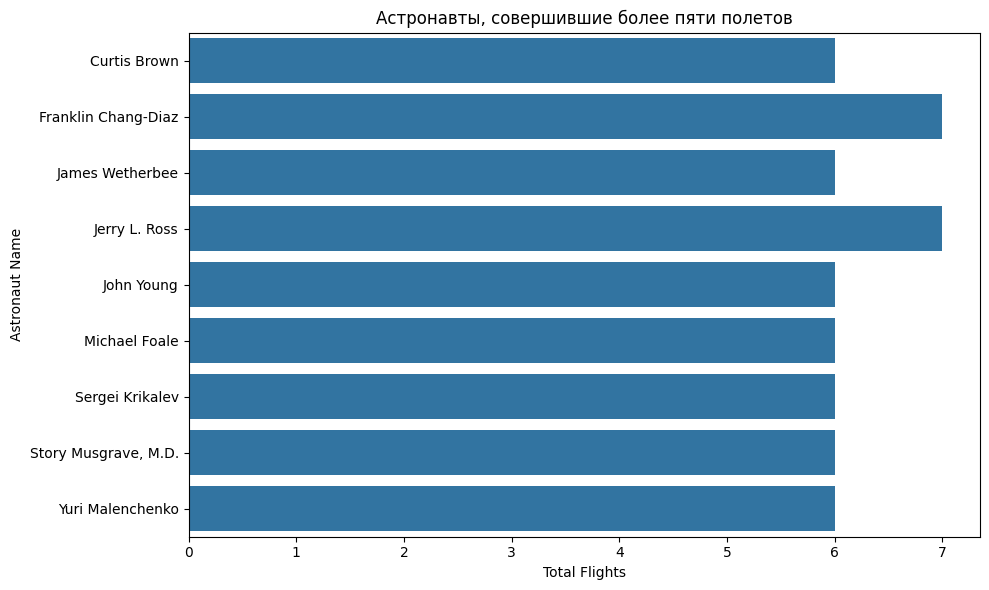

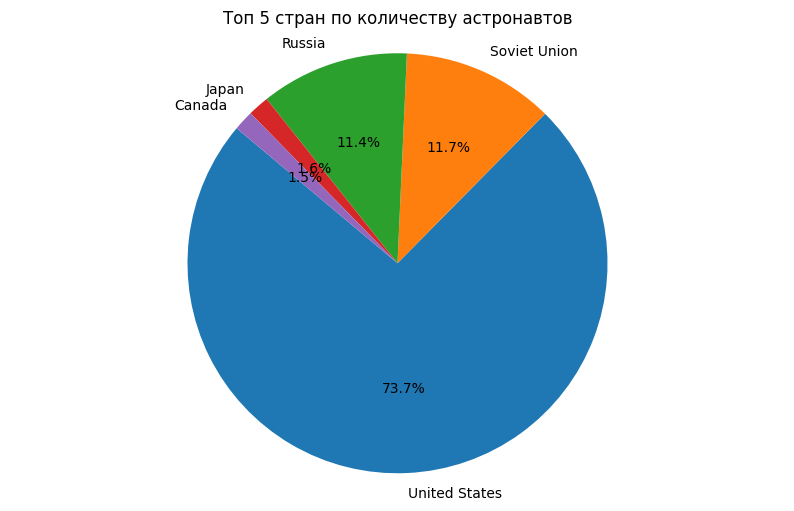

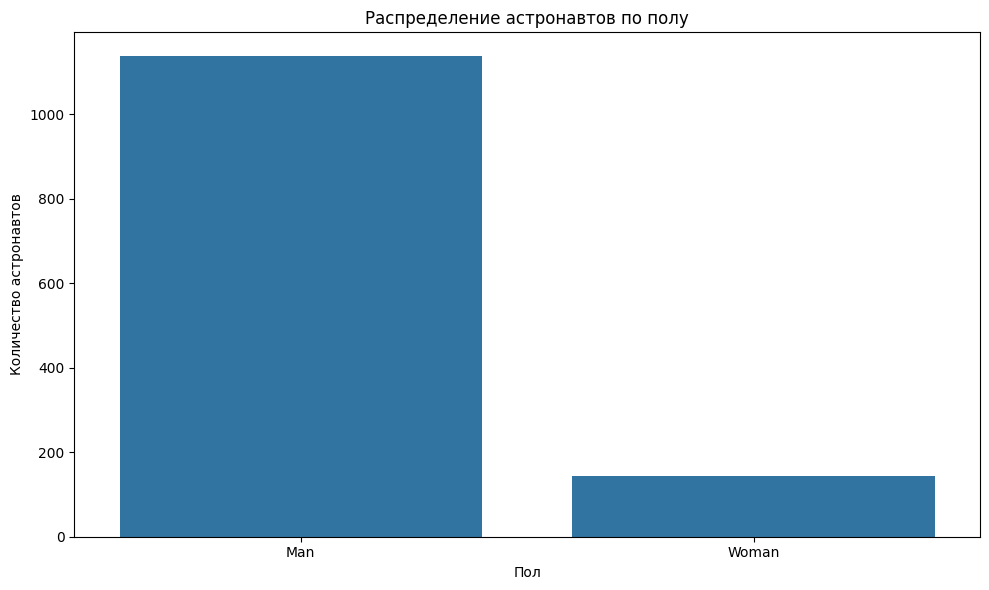

In [14]:
plot_astronauts_with_more_than_5_flights()
plot_top_5_astronauts_by_country()
plot_astronauts_by_gender()

In [15]:
# Закрытие соединения с базой данных
conn.close()

In [1]:
!pip freeze > requirements.txt